# Importing Libraries Used

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in our Dataset

In [204]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('FILE PATH HERE')
df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


# Data Understanding
- What is the `shape` of the Dataframe

- What `dtypes` are in the Data

- `describe` some of the numeric values in the Data

- Get a `sample` of the data to see what type of info it holds

In [205]:
df.shape

(342, 16)

In [206]:
df.dtypes # Distance column will have to be converted later in the cleaning process

Unnamed: 0         int64
hostel.name       object
City              object
price.from         int64
Distance          object
summary.score    float64
rating.band       object
atmosphere       float64
cleanliness      float64
facilities       float64
location.y       float64
security         float64
staff            float64
valueformoney    float64
lon              float64
lat              float64
dtype: object

In [207]:
df.describe()

,Unnamed: 0,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
count,342.000000,3.420000e+02,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,298.000000,298.000000
mean,171.500000,8.388012e+03,8.782569,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,136.756376,34.976583
std,98.871128,7.641527e+04,0.960909,1.382002,1.215775,1.285356,1.102703,1.114345,1.086513,1.047809,3.251995,2.040896
min,1.000000,1.000000e+03,3.100000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,103.873135,1.310820
25%,86.250000,2.000000e+03,8.600000,7.800000,8.800000,8.000000,8.000000,8.700000,9.000000,8.600000,135.505314,34.668900
50%,171.500000,2.500000e+03,9.000000,8.600000,9.300000,9.000000,9.000000,9.200000,9.400000,9.000000,135.761617,34.998470
75%,256.750000,2.900000e+03,9.400000,9.000000,9.800000,9.300000,9.400000,9.600000,9.800000,9.500000,139.770187,35.696709
max,342.000000,1.003200e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,139.877880,36.204824


In [208]:
df.sample(5)

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
129,130,Hop Step Inn,Tokyo,1500,8.5km from city centre,9.1,Superb,8.5,9.6,9.3,8.3,9.6,9.4,9.2,139.738279,35.756018
12,13,Akihabara Hotel 3000,Tokyo,2200,8km from city centre,10.0,Superb,10.0,10.0,10.0,10.0,10.0,10.0,10.0,139.779382,35.697490
181,182,IM Guest House,Osaka,1900,6.2km from city centre,8.3,Fabulous,7.0,8.0,7.0,8.0,9.0,10.0,9.0,NaN,NaN
319,320,Tokyo House Inn,Tokyo,3800,1.5km from city centre,6.8,Good,6.0,6.7,6.7,8.0,6.0,7.3,6.7,139.703819,35.699006
245,246,Okara Guesthouse,Kyoto,1900,2.4km from city centre,9.4,Superb,9.2,9.8,9.4,9.2,9.4,9.4,9.4,135.755031,34.992592


# Data Prep

1. `drop` columns that will not be useful

2. `rename` columns to something more meaningful for better comprehension and querying

3. Checking for any NaN values `isna` and dropping/filling the values as needed

4. Checking and Dropping any `duplicated` values as needed

5. Cleaning and `extract`ing the numbers from the distance column

6. Convert Yen and km to USD and miles

7. Convert cleaned dataset to a csv file

### 1. Dropped unuseful columns

In [209]:
df.drop(columns={'Unnamed: 0'}, inplace=True)
df.head()

,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


### 2. Renamed columns to something more meaningful to the dataset

In [210]:
df.rename(columns={'hostel.name': 'Name', 'price.from': 'Price_YEN', 'summary.score': 'Overall_Rating',
                   'rating.band': 'Rating_Band', 'atmosphere': 'Atmosphere', 'cleanliness': 'Cleanliness', 
                   'facilities': 'Facilities', 'location.y': 'Location', 'security': 'Security', 'staff': 'Staff', 
                   'valueformoney': 'Value', 'lon': 'Lon', 'lat': 'Lat'}, inplace=True)
df.head()

,Name,City,Price_YEN,Distance,Overall_Rating,Rating_Band,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,Value,Lon,Lat
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


### 3. Checking if there is any NaN values

In [211]:
df.isna().any(axis=1).sum() # there are 44 rows with atleast 1 NaN value in it 

44

#### 3.1 Querying the rows with NaN values in them

In [212]:
rows_with_na = df[df.isna().any(axis=1)]
rows_with_na.head(50)

,Name,City,Price_YEN,Distance,Overall_Rating,Rating_Band,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,Value,Lon,Lat
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
7,36Hostel,Hiroshima,2000,1.6km from city centre,9.5,Superb,8.8,9.9,9.2,9.6,9.8,9.8,9.5,NaN,NaN
8,3Q House - Asakusa Smile,Tokyo,2500,10.2km from city centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Bed Stock,Fukuoka-City,2500,1.1km from city centre,8.9,Fabulous,8.6,9.9,8.1,9.4,8.9,9.0,8.6,NaN,NaN
34,bnb+ Ninja Dojo Ueno,Tokyo,2500,8km from city centre,5.2,Rating,4.0,3.3,4.0,8.7,5.3,4.7,6.7,NaN,NaN
35,bnb+Shinjuku Castle,Tokyo,2500,1.3km from city centre,5.0,Rating,2.7,4.0,3.3,7.3,5.3,5.3,6.7,NaN,NaN
37,Bonsai Guest House,Osaka,1800,5.9km from city centre,8.7,Fabulous,7.5,9.1,8.4,9.5,8.9,8.9,8.8,NaN,NaN
43,Calendar Hotel,Kyoto,3500,8.8km from city centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Capsule Hotel Anshin Oyado Akihabara,Tokyo,6200,0km from city centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Capsule Hotel Anshin Oyado Shinbashi,Tokyo,6000,6.6km from city centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.2 Dropping rows that have NaN values in more than 2 columns

- the rows containing more than 2 NaN have almost all of the columns as NaN so they are not useful 

- the rows containing 2 or less NaN values are only missing the lon and lat values which can still be useful

In [213]:
df.shape #before dropping the rows 

(342, 15)

In [214]:
df = df[df.isna().sum(axis=1) < 3] # 15 rows were dropped which matches up to the expected amount
df.reset_index(inplace=True, drop=True)
df.shape # after dropping the rows 

(327, 15)

In [215]:
df.isna().any(axis=1).sum() # These rows are only missing lon and lat values

29

In [216]:
df[['Lon', 'Lat']] = df[['Lon', 'Lat']].fillna(0) # filling the remaining NaN values with 0 for a cleaner table

### 4. Checking and Dropping Duplicates

In [217]:
df.duplicated().sum() # There were no duplicates

0

### 5. Cleaning and Extracting the numbers from the distance column

In [218]:
df.head()

,Name,City,Price_YEN,Distance,Overall_Rating,Rating_Band,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,Value,Lon,Lat
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,0.000000,0.000000
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [219]:
df['Distance'] = df['Distance'].str.extract('([\d\.]+)') # keeps only the digits and decimal in the string
df.rename(columns={'Distance': 'Distance_km'}, inplace=True)
df.head()

,Name,City,Price_YEN,Distance_km,Overall_Rating,Rating_Band,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,Value,Lon,Lat
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,0.000000,0.000000
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


### 6. Convert Yen and km to USD and miles

In [220]:
df['Distance_km'] = df['Distance_km'].astype(float) # Converted the Distance_km column to type float so the conversion can be calculated 

In [221]:
df['Price_USD'] = df['Price_YEN'] * 0.0066 # the current conversion rate at the time of development.
df['Distance_mi'] = (df['Distance_km'] * 0.621371).round(2)
df.insert(3, 'Price_USD', df.pop('Price_USD'))
df.insert(5, 'Distance_mi', df.pop('Distance_mi'))
df.head(10) # at this point the data is cleaned and ready to be used in our EDA

,Name,City,Price_YEN,Price_USD,Distance_km,Distance_mi,Overall_Rating,Rating_Band,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,Value,Lon,Lat
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,21.78,2.9,1.80,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,17.16,0.7,0.43,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,0.000000,0.000000
2,&And Hostel Akihabara,Tokyo,3600,23.76,7.8,4.85,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,17.16,8.7,5.41,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,9.90,10.5,6.52,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,13.86,9.4,5.84,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384
6,328 Hostel & Lounge,Tokyo,3300,21.78,16.5,10.25,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044
7,36Hostel,Hiroshima,2000,13.20,1.6,0.99,9.5,Superb,8.8,9.9,9.2,9.6,9.8,9.8,9.5,0.000000,0.000000
8,Ace Inn Shinjuku,Tokyo,2200,14.52,3.0,1.86,7.7,Very Good,6.7,7.2,6.8,8.5,7.8,8.5,8.1,139.724304,35.692512
9,Air Osaka Hostel,Osaka,1600,10.56,9.7,6.03,9.2,Superb,9.5,9.1,8.7,8.8,8.9,9.8,9.5,135.476956,34.622260


### 7. Converting cleaned dataset to a csv file

In [222]:
df.to_csv('FILE PATH HERE', sep=',', header=True, index=False)

# Data Analysis

1. What's the average price of a hostel for 1 night?

2. Does the city of the hostel change the price?

3. Does the distance from the center of the city affect pricing?

4. What city has the most and least hostels?

5. What city has the best and worst-rated hostels on average?

6. What ratings does each city have?

7. How do various aspects of hostel experience correlate with each other?

### 1. What's the average price of a hostel for 1 night?

In [223]:
df['Price_USD'].mean() # average price including the 2 outliers

56.84275229357799

In [224]:
df[df['Price_USD'] == 6621.12] # these 2 are the outliers in the column which is causing the average to be significantly higher than it really is

,Name,City,Price_YEN,Price_USD,Distance_km,Distance_mi,Overall_Rating,Rating_Band,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,Value,Lon,Lat
276,Shell Nell namba,Osaka,1003200,6621.12,4.8,2.98,8.3,Fabulous,6.0,8.0,9.0,9.0,9.0,9.0,8.0,135.506291,34.663375
302,Tokyo Central Youth Hostel,Tokyo,1003200,6621.12,4.8,2.98,8.0,Fabulous,6.0,10.0,10.0,8.0,8.0,8.0,6.0,139.743522,35.700821


In [225]:
df['Price_USD'].describe()

count     327.000000
mean       56.842752
std       515.761679
min         6.600000
25%        13.200000
50%        16.500000
75%        19.140000
max      6621.120000
Name: Price_USD, dtype: float64

In [226]:
filtered_df = df[~(df['Price_USD'] == 6621.12)] # filtering out the 2 outliers
filtered_df.shape

(325, 17)

In [227]:
filtered_df['Price_USD'].mean() # average price exluding the 2 outliers

16.4472

In [228]:
filtered_df['Price_USD'].describe()

count    325.000000
mean      16.447200
std        5.411771
min        6.600000
25%       13.200000
50%       16.500000
75%       19.140000
max       50.160000
Name: Price_USD, dtype: float64

In [229]:
filtered_df = df[~(df['Price_YEN'] == 1003200)] # filtering out the 2 outliers
filtered_df.shape

(325, 17)

In [230]:
filtered_df['Price_YEN'].mean() # average price exluding the 2 outliers

2492.0

In [231]:
filtered_df['Price_YEN'].describe()

count     325.000000
mean     2492.000000
std       819.965371
min      1000.000000
25%      2000.000000
50%      2500.000000
75%      2900.000000
max      7600.000000
Name: Price_YEN, dtype: float64

### 2. Does the city of the hostel change the price?

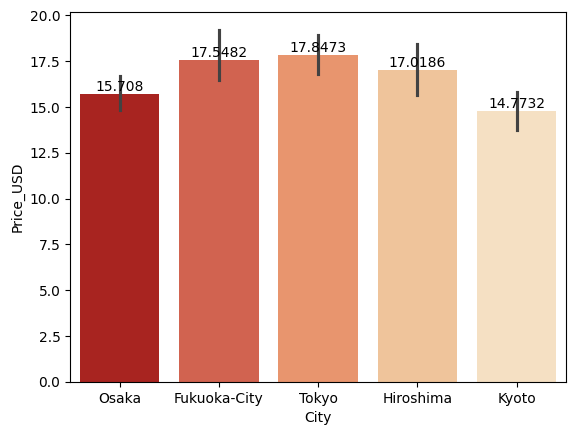

In [232]:
filtered_df = df[~(df['Price_USD'] == 6621.12)] # filtering out the 2 outliers
filtered_df.groupby('City')['Price_USD'].mean()
ax = sns.barplot(data=filtered_df, x='City', y='Price_USD', hue='City', palette='OrRd_r')
for container in ax.containers:
    ax.bar_label(container)

### 3. Does the distance from the center of the city affect pricing?

<Axes: xlabel='Distance_mi', ylabel='Price_USD'>

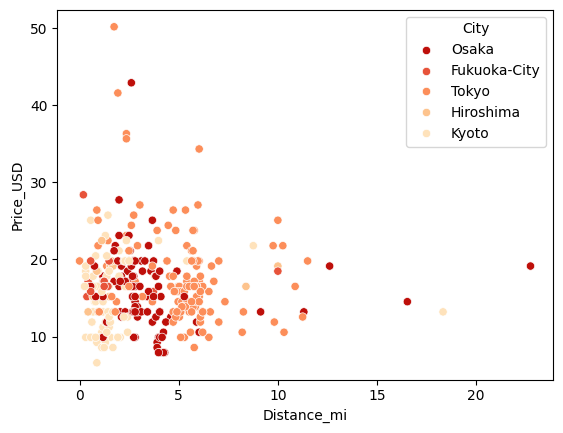

In [233]:
filtered_df = df[~(df['Price_USD'] == 6621.12)] # filtering out the 2 outliers
sns.scatterplot(data=filtered_df, x='Distance_mi', y='Price_USD', hue='City', palette='OrRd_r')

### 4. What city has the most and least hostels?

In [234]:
df.groupby('City').size()

City
Fukuoka-City     17
Hiroshima        14
Kyoto            73
Osaka           101
Tokyo           122
dtype: int64

### 5. What city has the best and worst-rated hostels on average?

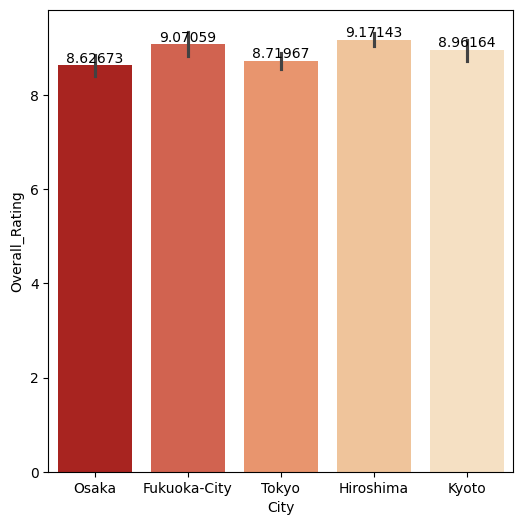

In [235]:
df.groupby('City')['Overall_Rating'].mean()
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=df, x='City', y='Overall_Rating', hue='City', palette='OrRd_r')
for container in ax.containers:
    ax.bar_label(container)

### 6. What ratings does each city have?

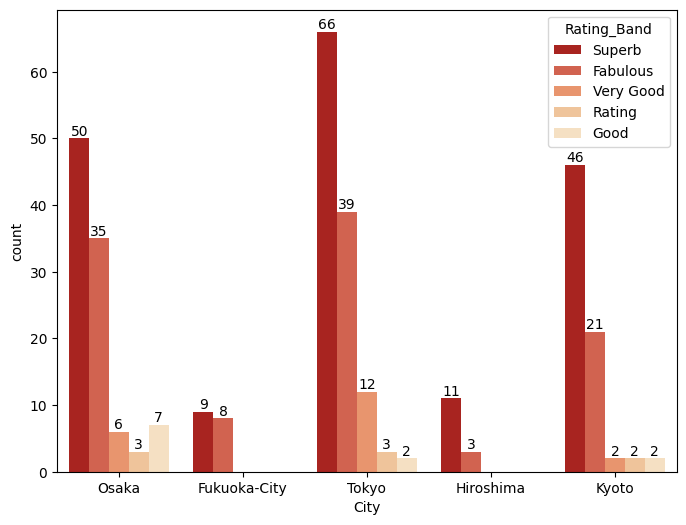

In [236]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='City', hue='Rating_Band', palette='OrRd_r')
for container in ax.containers:
    ax.bar_label(container)

### 7. How do various aspects of hostel experience correlate with each other?

<Axes: >

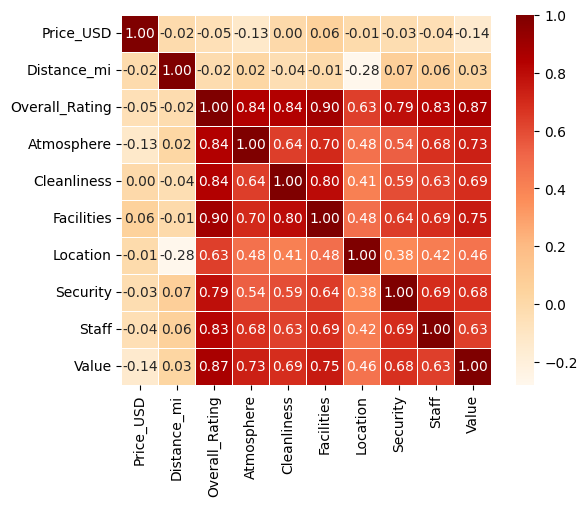

In [237]:
correlation_matrix = df[['Price_USD', 'Distance_mi', 'Overall_Rating', 'Atmosphere', 'Cleanliness', 'Facilities', 'Location', 'Security', 'Staff', 'Value']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='OrRd', cbar=True, square=True, linewidths=.5)